# Prévalence du Listeria dans le lait cru

In [1]:
!ls

README.md                 listeria.txt              projets2021.pdf
exploratoire_claire.ipynb mcmc.ipynb


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rd
import statistics as stats
import math
from math import gamma
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf


# Exploration rapide des données

In [173]:
data = pd.read_csv('listeria.txt', sep=',')
data.columns = ['nb_pos', 'nb_test']
new_row = {'nb_pos':0, 'nb_test':600}
data = data.append(new_row, ignore_index=True)
data['prob']=data["nb_pos"]/data['nb_test']
proba_constante = sum(data['nb_pos'])/sum(data['nb_test'])

In [3]:
# distribution du nombre de testés dans chaque étude

data['nb_test'].sort_values()

86         14
87         16
83         16
85         17
17         20
       ...   
40       1720
62       2009
44       2511
20       4046
18    1227053
Name: nb_test, Length: 91, dtype: int64

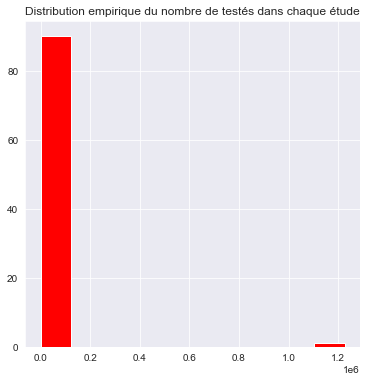

In [48]:
dg=data['nb_test']
plt.figure(figsize=(6,6))
plt.hist(dg, density=False,color="red")
plt.title("Distribution empirique du nombre de testés dans chaque étude")
plt.show()

On voit qu'une étude se distingue clairement des autres de par son ampleur. Il s'agit de l'étude 18 qui concerne 1 227 053 personnes !

In [20]:
# distribution du nombre de positifs dans chaque étude

data['nb_pos'].sort_values()

0       0
17      0
16      0
15      0
14      0
     ... 
44     79
69     85
79     90
62    102
18    278
Name: nb_pos, Length: 91, dtype: int64

Le nombre de positifs a l'air lui plus homogène entre chaque étude. Le plus grand nombre de positifs est pour l'étude 18 (assez cohérent car c'est elle qui a testé le plus de personnes). A priori donc, aucune raison d'enlever cette étude de nos données.

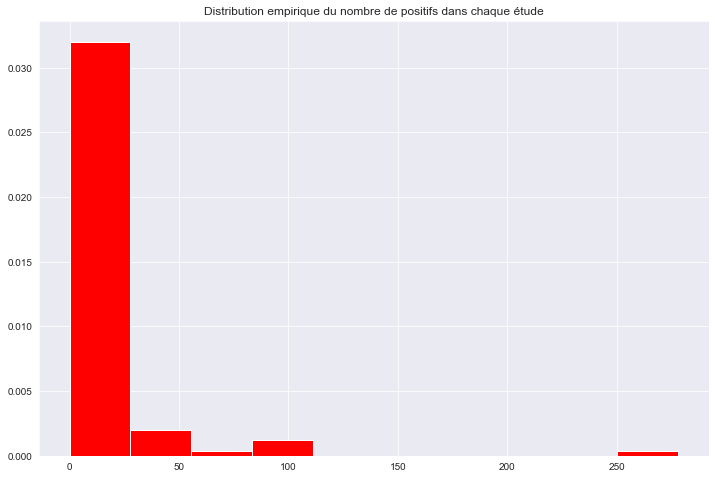

In [47]:
# distribution du nombre de positifs dans chaque étude

dg=data['nb_pos']
plt.figure(figsize=(12,8))
plt.hist(dg, density=True,color="red")
plt.title("Distribution empirique du nombre de positifs dans chaque étude")
plt.show()

In [25]:
# le plus important : distribution empirique de probabilité de positivité dans chaque étude

data['prob'].sort_values()

0     0.000000
17    0.000000
16    0.000000
15    0.000000
14    0.000000
        ...   
85    0.294118
86    0.428571
87    0.437500
88    0.452632
89    0.809524
Name: prob, Length: 91, dtype: float64

L'étude 89 affiche une probabilité empirique assez élevée, de presque $0.81$. On voit clairement que cette probabilité est supérieure à toutes les autres : 

Text(0.5, 1.0, 'Distribution des probas a priori empiriques')

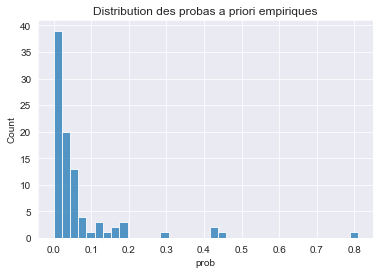

In [46]:
sns.set_style('darkgrid')
sns.histplot(data['prob'])
plt.title("Distribution des probas a priori empiriques")

Il faudra peut-être songer à l'enlever des données...

In [45]:
proba_constante

0.0010564383073439964

# Question 1 : détermination de la loi a posteriori

On suppose dans un premier temps que la probabilité de présence de listeria dans toutes les études est constante $p$.


Modèle binomial : $r_i \sim \mathcal{B}(n_i,p)$, de fonction de masse $f(r_i, p) = \binom{n_i}{r_i} p^{r_i} (1-p)^{n_i-r_i}$ 

Loi a priori : $p \sim \mathcal{B}eta(\alpha,\beta)$ avec $\alpha, \beta = 1$ ce qui revient à avoir $p \propto \mathcal{U}([0,1])$ donc de densité $\mathbb{1}_{[0,1]}(p)$

La densité de la loi a posteriori est alors ($n$=91 est le nombre d'études) : 

$\pi(p|r_1,\dots, r_n) \propto \prod_{i=1}^{n}f(r_i,p) \mathbb{1}_{[0,1]}(p) 
\\  \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto \prod_{i=1}^{n} p^{r_i} (1-p)^{(n_i-r_i)}\mathbb{1}_{[0,1]}(p)   \\  \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto p^{\sum_{i=1}^{n}r_i} (1-p)^{\sum_{i=1}^{n}(n_i-r_i)}\mathbb{1}_{[0,1]}(p)   \sim \mathcal{B}eta(\sum_{i=1}^{n}r_i +1, \sum_{i=1}^{n}(n_i-r_i)+1)$

Les observations nous permettent alors de calculer les deux paramètres de cette loi Bêta :


In [4]:
print("premier paramètre =",sum(data['nb_pos'])+1)
print("deuxième paramètre =",sum(data['nb_test'])-sum(data['nb_pos'])+1)

premier paramètre = 1329
deuxième paramètre = 1255727


Finalement, la loi a posteriori de $p$ est une $\boxed{\mathcal{B}eta(1329,1255727)}$

On n'utilise pas directement la fonction beta disponible dans le module stats de Python. En effet, du fait de la grande valeur des paramètres, il est préférable de reprogrammer par nous même une fonction gen_beta qui permet de tirer une valeur selon une loi beta

### Loi exponentielle 



In [10]:
def gen_exp(theta):
    u = rd.random()
    return -1/theta*np.log(1-u)

### Loi gamma

------------
Soient $X$ et $Y$ deux variables independantes distribuees suivant des lois  $\Gamma(a,1)$ et $\Gamma(b,1)$

Alors $U = X+Y$ et $V = X/(X+Y)$ sont deux variables independantes distribuees suivant des lois $\Gamma(a+b,1)$ et $\mathcal{B}eta(a,b)$.





In [28]:
def gama(x):
    l = [gen_exp(x) for i in range(10000)]
    return mean(l)
        
def f(x, a, b):
    return b**a*x**(a-1)*exp(-bx)/gamma(a)

In [77]:
def gen_gamma(a,b):
    # si alpha = 1, cela revient à avoir une loi exponentielle de paramètre beta
    if a == 1:
        return gen_exp(b)
    # si alpha est un entier non nul, gamma coïncide avec une somme de alpha va exponentielles
    # de paramètre beta indépendantes
    elif a == int(a) and a > 1 : 
        return sum([gen_exp(b) for i in range(a)])
    # sinon, on va utiliser une méthode de rejet 
    else : 
        while True : 
            # on va utiliser une loi de gamma de paramètres entiers pour g
            x = gen_gamma(int(a), b+1)
            # constante calculée dans la photo sur messenger
            c = b**a/((b+1)**int(a))*gama(int(a))/gama(a)*(a-int(a))**(a-int(a))*exp(-int(a)+a)
            u = rd.random()
            if u <= c*f(x, a, b)/g(x, int(a), b+1):
                return x 
        
        

### Loi Beta

In [78]:
def gen_beta(alpha, beta):
    X = gen_gamma(alpha, 1)
    Y = gen_gamma(beta,1)
    return X/(X+Y)

In [32]:
# on génère désormais notre beta(1329,1255727)

distr = [gen_beta(1329,1255727) for i in range(1000)]


In [27]:
# probabiliré agrégeé dans nos données, qu'on va comparer avec la distribution de notre loi a posteriori

proba_constante = sum(data['nb_pos'])/sum(data['nb_test'])
proba_constante

0.0010564383073439964

/home/guillot/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution de la loi a posteriori')

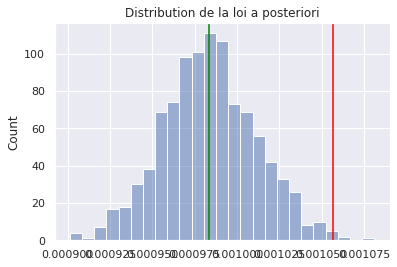

In [33]:
sns.set(style="darkgrid")
sns.histplot(distr, kde=True)
plt.axvline(proba_constante, color='red',label="probabilité agrégée trouvée dans les données")
p_esp = sum(distr)/len(distr)
plt.axvline(p_esp, color="green",label="probabilité agrégée trouvée dans la loi a posteriori")
plt.legend()
plt.title("Distribution de la loi a posteriori")

Le modèle n'approche pas très bien la probabilité agrégée de la présence de listeria (c'est-à-dire celle prise en agrégant l'ensemble des études).
De plus, on a vu que les études affichent des probabilités empiriques de présence de listeria assez variées. Il paraît donc plus judicieux de considérer des probabilités de présence de listeria $p_i$ qui varient avec l'étude $i$.$\newline$C'est l'objet de la deuxième question.

## Question 2 : 

On suppose dans un second temps que la probabilité de présence de listeria est variable selon les études.  

Modèle binomial : $r_i \sim \mathcal{B}(n_i,p_i)$, de fonction de masse $f(r_i, p_i) = \binom{n_i}{r_i} p_i^{r_i} (1-p_i)^{n_i-r_i}$

Loi a priori : $ \forall i, p_i \sim \mathcal{B}eta(\alpha,\beta)$, de densité $\displaystyle{\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}}p_i^{\alpha-1}(1-p_i)^{\beta-1}\mathbb{1}_{[0,1]}(p_i)$

L'énoncé propose la reparamétrisation suivante : $\mu = \alpha/(\alpha+\beta) \sim \mathcal{U}([0,1])$ et $\kappa = \alpha + \beta \sim \mathcal{E}(0.1)$

On supposera que : $\textbf{$\kappa$ et $\mu$ sont indépendantes}$ 

Donc on aura la densité jointe de $(\mu,\kappa)$ suivante : $p(\mu,\kappa)$ = $0.1 e^{-0.1\kappa}\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)$
     
En inversant : $\alpha = \kappa \mu $ et $\beta = \kappa (1-\mu)$

Et donc $p_i$ a pour densité (sachant $\mu$ et $\kappa$) : $p(p_i|\mu,\kappa)$  = $\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}p_i^{\kappa \mu-1}(1-p_i)^{\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)$

La densité de la loi a posteriori est alors : 

$\pi(\mu,\kappa,p_1,...,p_n|r_1,\dots, r_n) \propto \left(\prod_{i=1}^{n}f(r_i,p_i)p(p_i|\mu,\kappa)\right)p(\mu,\kappa)
\\    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto \left(\prod_{i=1}^{n} p_i^{r_i} (1-p_i)^{(n_i-r_i)}\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}p_i^{\kappa \mu-1}(1-p_i)^{\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)\right)e^{-0.1\kappa}\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)  
\\    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto e^{-0.1\kappa}\left(\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}\right)^n\left(\prod_{i=1}^{n} p_i^{r_i+\kappa \mu -1} (1-p_i)^{(n_i-r_i)+\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)\right)\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)$ 

Contrairement au cas précédent, la loi a posteriori ne correspond pas à une loi usuelle connue. 
On va alors mettre en oeuvre un algorithme de $\textbf{Metropolis within Gibbs}$ pour simuler cette loi a posteriori, en s'appuyant sur les différentes lois (connues) de nos paramètres $(p_i)_i,\kappa$ et $\mu$.

In [66]:
def indicatrice1(x):
    if x <1 and x>0:
        return 1
    else:
        return 0

def indicatrice2(x):
    if x >=0:
        return 1
    else:
        return 0


In [67]:
def metropolis_within_gibbs(x,sigma_1,sigma_2):
    mu=x[91]      # valeur précédente de mu
    kap=x[92]     # valeur précédente de kappa
    
    y=np.zeros(93)  #initialisation d'un vecteur y qui contiendra les valeurs à l'étape suivante
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()       # proposition pour la prochaine valeur de mu 
    
    if indicatrice1(z)==0:
        seuil=0
    else:
        quantite_1=((1/gamma(kap*z))*(1/gamma(kap*(1-z))))**91
        quantite_2=((1/gamma(kap*mu))*(1/gamma(kap*(1-mu))))**91
        quantite_3=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(kap*(z-mu))
        seuil=min(1,(quantite_1*quantite_3)/quantite_2)
                                                                   
    if np.random.rand() < seuil:             # on accepte z comme nouvelle valeur de mu
        y[91]=z
    
    else:
        y[91]=mu                             # on garde l'ancienne valeur de mu
    
    
    w = kap + sigma_2 * np.random.randn()         # proposition pour la prochaine valeur de kappa
    
    if indicatrice2(w)==0:
        seuil=0
    else:
        quantite_1=np.exp(-0.1*(w-kap))
        quantite_2=((gamma(w)/gamma(w*y[91]))*(1/gamma(w*(1-y[91]))))**91
        quantite_3=((gamma(kap)/gamma(kap*y[91]))*(1/gamma(kap*(1-y[91]))))**91
        quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
        quantite_5=(math.prod([(1-y[i]) for i in range(0,91)]))**(w-kap)
        seuil=min(1,(quantite_1*quantite_2*quantite_4*quantite_5)/quantite_3)
        
    if np.random.rand() < seuil:             # on accepte w comme nouvelle valeur de kappa
        y[92]=w
    
    else:
        y[92]=kap                            # on garde l'ancienne valeur de kappa  

    
    return y      # on retourne le vecteur des nouvelles valeurs

In [68]:
# initialisation de notre vecteur y qui contiendra les valeurs successives de nos 93 paramètres (les 91 p_i + mu + kappa)

N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]           # on prend les probas empiriques comme probas initiales
    
y[0,91]=0.5         # valeur initiale pour mu car mu suit une uniforme sur [0,1]
y[0,92]=10          # valeur initiale pour kappa car kappa suit une exp(0.1) donc est de moyenne 10


# generate chain

for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs(y[n-1],sigma_1=0.3,sigma_2=0.5)

  2%|▏         | 169/9999 [00:01<02:55, 56.10it/s]<ipython-input-67-c4e8369fe25e>:20: RuntimeWarning: invalid value encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_3)/quantite_2)
  8%|▊         | 782/9999 [00:04<00:47, 195.34it/s]<ipython-input-67-c4e8369fe25e>:19: RuntimeWarning: overflow encountered in double_scalars
  quantite_3=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(kap*(z-mu))
<ipython-input-67-c4e8369fe25e>:37: RuntimeWarning: divide by zero encountered in double_scalars
  quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
 21%|██▏       | 2131/9999 [00:11<00:37, 207.17it/s]<ipython-input-67-c4e8369fe25e>:20: RuntimeWarning: divide by zero encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_3)/quantite_2)
100%|██████████| 9999/9999 [00:53<00:00, 186.96it/s]


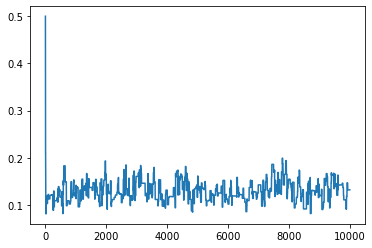

In [203]:
plt.plot(y[:,91])

# MCMC trace pour mu

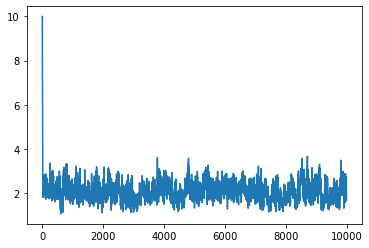

In [204]:
plt.plot(y[:,92])

# MCMC trace pour kappa

Problème : on souhaite augmenter les valeurs de sigma_1 et sigma_2 (par exemple à 0.3 et 10) mais quand on le fait, il y a une erreur numérique (le calcul d'une quantité mobilise trop de place). Illustration : 

In [205]:
# réinitialisation de y

N = 1000
y = np.empty((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10


for n in tqdm(range(1, 1000)):
    y[n] = metropolis_within_gibbs(y[n-1],sigma_1=0.3,sigma_2=10)

  0%|          | 0/999 [00:00<?, ?it/s]<ipython-input-201-fbf65cd40e52>:39: RuntimeWarning: overflow encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_2*quantite_4*quantite_5)/quantite_3)
<ipython-input-201-fbf65cd40e52>:37: RuntimeWarning: overflow encountered in double_scalars
  quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
  0%|          | 3/999 [00:00<00:05, 175.02it/s]


OverflowError: (34, 'Numerical result out of range')

Solution : reprogrammer la fonction gamma de Python car celle-ci tient trop de place + passer l'évaluation des seuils en log. De cette façon, il n'y a plus d'erreurs générées par notre code, et on peut faire varier à souhait les varianes

In [174]:
def gammar(x):
    if x>1:
        return (x-1)*gammar(x-1)
    else:
        return gamma(x)

In [175]:
def metropolis_within_gibbs_bis(x,sigma_1,sigma_2):
    mu=x[91]      # valeur précédente de mu
    kap=x[92]     # valeur précédente de kappa
    
    y=np.zeros(93)  #initialisation d'un vecteur y qui contiendra les valeurs à l'étape suivante
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()       # proposition pour la prochaine valeur de mu 
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de mu
        y[91]=z
    
    else:
        y[91]=mu                             # on garde l'ancienne valeur de mu
    
    
    w = kap + sigma_2 * np.random.randn()         # proposition pour la prochaine valeur de kappa
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             # on accepte w comme nouvelle valeur de kappa
        y[92]=w
    
    else:
        y[92]=kap                            # on garde l'ancienne valeur de kappa  

    
    return y      # on retourne le vecteur des nouvelles valeurs

In [61]:
# réinitialisation de notre vecteur y 

N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10


for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs_bis(y[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:01<00:00, 161.82it/s]


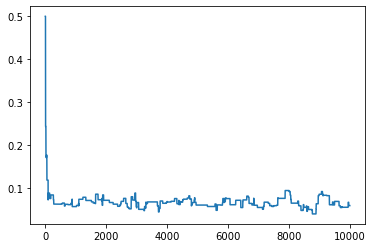

In [62]:
plt.plot(y[:,91])

# MCMC trace pour mu

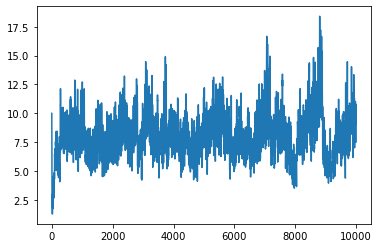

In [63]:
plt.plot(y[:,92])

# MCMC trace pour kappa

Résultats : à partir de la 50ème itération, l'algo semble converger.
Vérifions-le en "zoomant" : 


Pour être sûr de se situer dans la zone de convergence, on va considérer que la zone de burn-in est la plage [0;2000]

### Caractérisation des lois a posteriori de mu et kappa

<AxesSubplot:ylabel='Count'>

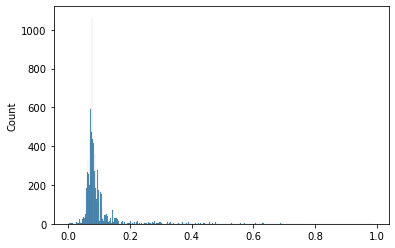

In [98]:
# mu

sns.histplot((y[2000:,91]))

On obtient une distribution symétrique autour de la moyenne, qui peut ressembler à la distribution d'une loi normale, avec cependant un pic important à la moyenne

Si c'était une loi normale, quels en seraient les paramètres ?

In [114]:
moy=np.mean(y[2000:,91])
e_type=np.std(y[2000:,91])

print("moyenne=",moy)
print("écart-type=",e_type)

moyenne= 0.09574601832482028
écart-type= 0.06945272228164598


Est-ce vraisemblable de penser que la loi de $\mu$ est une $\mathcal{N}(0.096,0.069²)$ ?

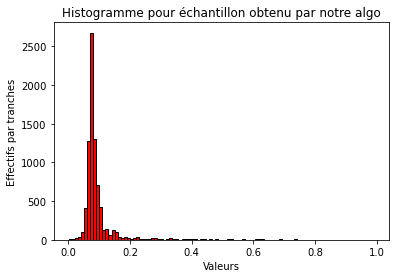

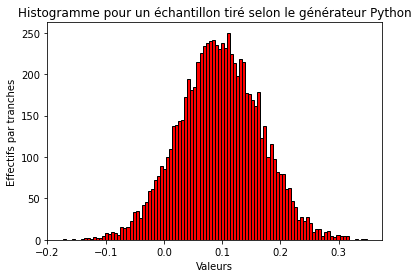

In [103]:
# Visualisation de l'adéquation à la loi normale :

X=y[2000:,91]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Il ne s'agit pas d'une loi normale. Les distributions entre les deux échantillons diffèrent

In [106]:
# Test de Kolmogorov-Smirnov

import scipy.stats as statis

X=y[2000:,91]
Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
D1,p1=statis.kstest(X, 'norm', (moy,e_type))
D2,p2=statis.kstest(Y, 'norm', (moy,e_type))

print("D1=",D1)
print("p-valeur_1=",p1)
print("D2=",D2)
print("p-valeur_2=",p2)

D1= 0.2959104108726288
p-valeur_1= 0.0
D2= 0.006517738803456852
p-valeur_2= 0.8837291642661295


Le test de KS rejette bien l'hypothèse selon laquelle mu suit une loi normale

Et une loi beta ?

In [49]:
moy1=np.mean(y[2000:,91])
e_type1=np.std(y[2000:,91])
var1=np.var(y[2000:,91])

#estimation des paramètres par la méthode des moments

a=moy1*(moy1-moy1**2-var1)/var1
b=(moy1-2*(moy1**2)+moy1**3-var1+moy1*var1)/var1

print("alpha=",a)
print("beta=",b)

alpha= 40.493596574611175
beta= 584.6784689213715


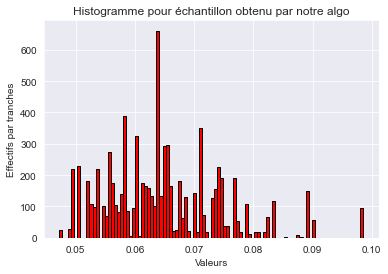

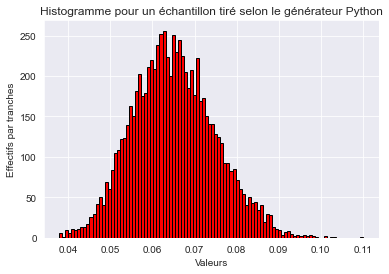

In [50]:
# Visualisation de l'adéquation à la loi beta :

X=y[2000:,91]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.beta(a,b) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Ce n'est pas non plus une loi beta 

<AxesSubplot:ylabel='Count'>

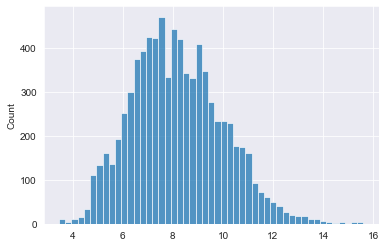

In [51]:
# kappa

sns.histplot((y[2000:,92]))

On obtient aussi une distribution symétrique 

In [52]:
moy2=np.mean(y[2000:,92])
e_type2=np.std(y[2000:,92])

print("moyenne=",moy2)
print("écart-type=",e_type2)

moyenne= 8.16763568360069
écart-type= 1.824767904259694


Est-ce vraisemblable de penser que la loi de $\mu$ est une $\mathcal{N}(6.24,1.24)$ ?

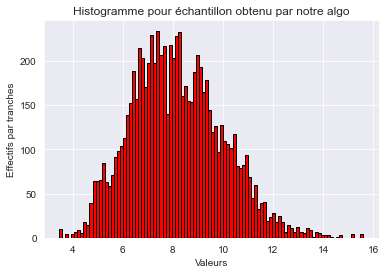

NameError: name 'moy' is not defined

In [53]:
# Visualisation de l'adéquation à la loi normale :

X=y[2000:,92]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Ici, les deux distributions semblent assez identiques !

In [55]:
# Test de Kolmogorov-Smirnov

import scipy.stats as statis

X=y[2000:,92]
Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
D1,p1=statis.kstest(X, 'norm', (moy,e_type))
D2,p2=statis.kstest(Y, 'norm', (moy,e_type))

print("D1=",D1)
print("p-valeur_1=",p1)
print("D2=",D2)
print("p-valeur_2=",p2)

NameError: name 'moy' is not defined

Le test de KS rejette aussi l'hypothèse selon laquelle kappa suit une loi normale

### Bilan : 
$\mu$ et $\kappa$ suivaient comme loi a priori une uniforme et une exponentielle respectivement.

Leurs distributions a posteriori apparaissent symétriques autour de leur moyenne

### Caractérisation des lois a posteriori des $(p_i)_i$

On a vu que $p_i \sim \mathcal{B}(\kappa \mu + r_i,\kappa(1-\mu)+n_i-r_i)$


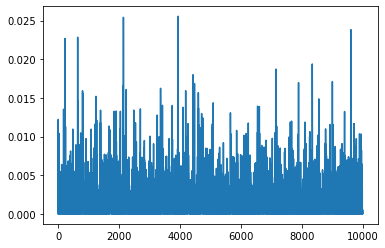

In [117]:
# ex pour l'étude 1

plt.plot(y[:,0])

# MCMC trace 

Text(0.5, 1.0, "Comparaison sur l'étude 1")

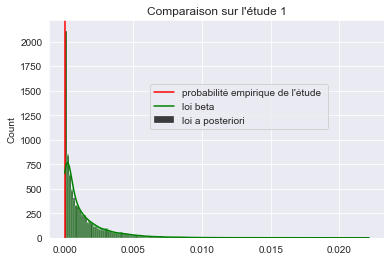

In [62]:
# etude 1

alpha=data['nb_pos'][0]+moy1*moy2
beta=data['nb_test'][0]-data['nb_pos'][0]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,0],color='black')
plt.axvline(data['prob'][0], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude ",'loi beta','loi a posteriori'],loc=(0.3,0.5))
plt.title("Comparaison sur l'étude 1")

Text(0.5, 1.0, "Comparaison sur l'étude 18 de la loi beta à notre loi a posteriori")

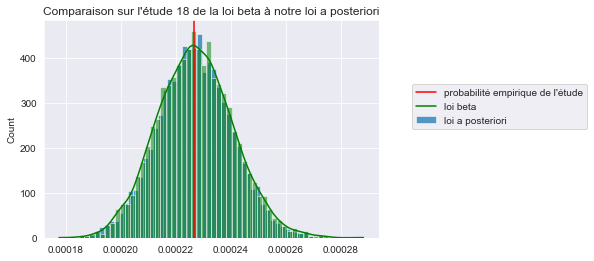

In [59]:
# etude 18 (celle où il y avait beaucoup de gens testés)

alpha=data['nb_pos'][18]+moy1*moy2
beta=data['nb_test'][18]-data['nb_pos'][18]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,18])
plt.axvline(data['prob'][18], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude",'loi beta','loi a posteriori'],loc=(1.1,0.5))
plt.title("Comparaison sur l'étude 18 de la loi beta à notre loi a posteriori")

Text(0.5, 1.0, "Comparaison sur l'étude 89 (beaucoup de positifs parmi les testés)")

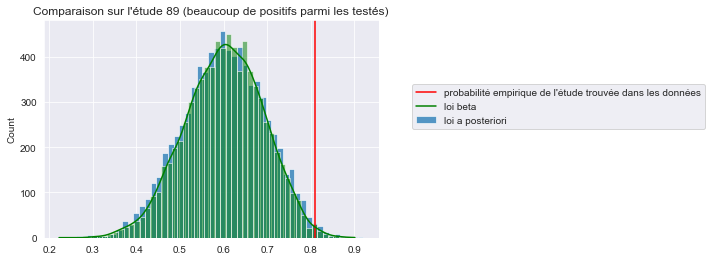

In [63]:
# etude 89 (celle où il y avait une grande part de positifs)
sns.set_style('darkgrid')
alpha=data['nb_pos'][89]+moy1*moy2
beta=data['nb_test'][89]-data['nb_pos'][89]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,89])
plt.axvline(data['prob'][89], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude trouvée dans les données",'loi beta','loi a posteriori'],loc=(1.1,0.5))
plt.title("Comparaison sur l'étude 89 (beaucoup de positifs parmi les testés)")

Maintenant qu'on a simuler nos lois a posteriori, on peut faire varier sigma_1 et sigma_2 et analyser certains critères de convergence : 

1) trace du paramètre d'intérêt : le paramètre doit fluctuer aléatoirement ; OK, les traces ont été vues

2) histogramme des valeurs générées ne dépend pas des valeurs initiales : à examiner

3) taux d'acceptation pas trop élevés ni trop faibles

4) tracer les fonctions d'autocorrélation : celles-ci doivent décroître rapidement

5) utiliser le DSCM

### critère 2

In [65]:
N = 10000
y1 = np.zeros((N, 93))

for i in range (0,91):
    y1[0,i]=data['prob'][i]
y1[0,91]=0.1                        # valeur initiale de mu = 0.1
y1[0,92]=10


for n in tqdm(range(1, 10000)):
    y1[n] = metropolis_within_gibbs_bis(y1[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [03:38<00:00, 45.81it/s]


In [66]:
N = 10000
y2 = np.zeros((N, 93))

for i in range (0,91):
    y2[0,i]=data['prob'][i]
y2[0,91]=0.1                        # valeur initiale de mu = 0.9 
y2[0,92]=10


for n in tqdm(range(1, 10000)):
    y2[n] = metropolis_within_gibbs_bis(y2[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [03:31<00:00, 47.33it/s]


Text(0.5, 1.0, 'Distribution de la loi a posteriori de mu pour des valeurs initiales de mu différentes')

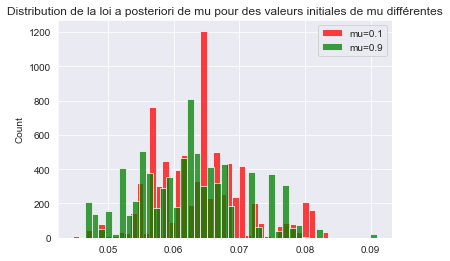

In [67]:
sns.histplot((y1[2000:,91]),color='red')
sns.histplot((y2[2000:,91]),color='green')
plt.legend(['mu=0.1','mu=0.9'])
plt.title("Distribution de la loi a posteriori de mu pour des valeurs initiales de mu différentes")

In [70]:
N = 10000
y3 = np.zeros((N, 93))

for i in range (0,91):
    y3[0,i]=data['prob'][i]
y3[0,91]=0.5                        
y3[0,92]=1                           # valeur initiale de kappa=1


for n in tqdm(range(1, 10000)):
    y3[n] = metropolis_within_gibbs_bis(y3[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [00:54<00:00, 182.82it/s]


In [71]:
N = 10000
y4 = np.zeros((N, 93))

for i in range (0,91):
    y4[0,i]=data['prob'][i]
y4[0,91]=0.5                        
y4[0,92]=10                           # valeur initiale de kappa=10


for n in tqdm(range(1, 10000)):
    y4[n] = metropolis_within_gibbs_bis(y4[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:00<00:00, 165.87it/s]


Text(0.5, 1.0, 'Distribution de la loi a posteriori de kappa pour des valeurs initiales de kappa différentes')

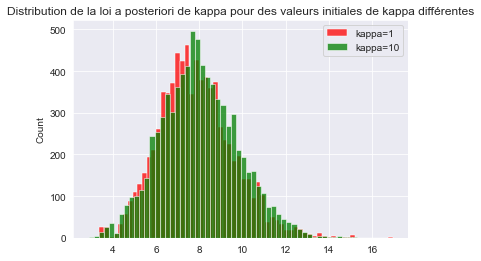

In [72]:
sns.histplot((y3[2000:,92]),color='red')
sns.histplot((y4[2000:,92]),color='green')
plt.legend(['kappa=1','kappa=10'])
plt.title("Distribution de la loi a posteriori de kappa pour des valeurs initiales de kappa différentes")

#### Bilan : critère 2 validé  globalement

### critère 3

Faisons varier sigma_1 et sigma_2 et examinons comment se comporte le taux d'acceptation : 

In [207]:
def metropolis_taux(x,sigma_1,sigma_2):
    accept_mu=0                              # à la fin, vaudra 1 si on a modifié mu à l'issue du prog, 0 sinon                         # 10 000 itérations  
    accept_kappa=0                           # idem
    
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93) 
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()      
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:            
        y[91]=z
        accept_mu+=1                    # on accepte mucomme nouvelle valeur de kappa donc on ajoute 1 à accepts
    
    else:
        y[91]=mu                             
    
    
    w = kap + sigma_2 * np.random.randn()         
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
        accept_kappa+=1                 # on accepte w comme nouvelle valeur de kappa donc on ajoute 1 à accepts
    
    else:
        y[92]=kap                            

    
    return y,accept_mu,accept_kappa     # on retourne les accepts en plus de y

In [230]:
def taux_acceptation(sigma_1,sigma_2):    # fonction qui évalue nos taux d'acceptation en fonction des varianes
    N = 1000                           
    y = np.zeros((N, 93))

    for i in range (0,91):
        y[0,i]=data['prob'][i]
    y[0,91]=0.5
    y[0,92]=10
    
    nb_accepts_mu=0
    nb_accepts_kappa=0

    for n in tqdm(range(1, 1000)):
        r=metropolis_taux(y[n-1],sigma_1,sigma_2)
        y[n]=r[0]
        nb_accepts_mu+=r[1]
        nb_accepts_kappa+=r[2]
    
    return (nb_accepts_mu/999)*100,(nb_accepts_kappa/999)*100



In [231]:
taux_acceptation(0.3,2)  # un petit ex pour les écarts-types 
                         # qu'on a utilisés jusqu'à présent : sigma_1 = 0.3 et sigma_2 = 2

100%|██████████| 999/999 [00:06<00:00, 161.70it/s]


(2.1021021021021022, 44.54454454454454)

Pour ces écarts-types (utilisés jusqu'à présent), le taux d'acceptation pour mu est de 2.1% et pour kappa, il est de 44.54%

In [339]:
# faisons maintenant varier sigma_1 et sigma_2 

l_mu, l_kappa = [],[]
for sigma_1 in np.linspace(0.01,0.1,10):                # sigma_1 va de 0,01 ; 0,02 ;... jusqu'à 0.1
    for sigma_2 in np.linspace(0.1,3,30):               # sigma_2 va de 0,1 ; 0,2 ;... jusqu'à 3
        r=taux_acceptation(sigma_1,sigma_2)
        l_mu.append(r[0])
        l_kappa.append(r[1])

100%|██████████| 999/999 [00:05<00:00, 166.58it/s]


On a ainsi 300 couples différents de ($\sigma_1$,$\sigma_2$)

In [366]:
# dataframe regroupant les résultats

# liste pour sigma_1

sigma_1=[]
for k in np.linspace(0.01,0.1,10):
    sigma_1+=30*[k]
    

# liste pour sigma_2

sigma_2=[]
for k in range(0,10):
    sigma_2=np.hstack((sigma_2,np.linspace(0.1,3,30)))
    
df = pd.DataFrame({'sigma_1':sigma_1, 'sigma_2':sigma_2, 'taux_mu':l_mu, 'taux_kappa':l_kappa})
df['sigma_1']=df['sigma_1'].apply(lambda s: np.round(s,2))

In [367]:
df   # de longueur 300 pour nos 300 couples différents

,sigma_1,sigma_2,taux_mu,taux_kappa
0,0.01,0.1,56.056056,93.793794
1,0.01,0.2,60.860861,90.290290
2,0.01,0.3,58.858859,83.283283
3,0.01,0.4,57.957958,81.181181
4,0.01,0.5,56.556557,80.280280
...,...,...,...,...
295,0.10,2.6,8.608609,40.240240
296,0.10,2.7,7.607608,39.939940
297,0.10,2.8,8.808809,39.339339
298,0.10,2.9,7.907908,39.939940


In [368]:
# export au format csv

df.to_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_var.csv",index=False)
df=pd.read_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_var.csv")

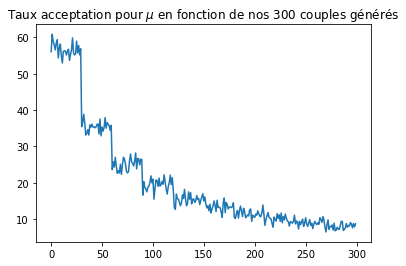

In [369]:
# taux d'acceptation pour mu selon les 300 couples


plt.title('Taux acceptation pour $\mu$ en fonction de nos 300 couples générés')
plt.plot(l_mu)

Le taux d'acceptation est très variable, mais doit être choisi plutot de l'ordre de 40/50 \%

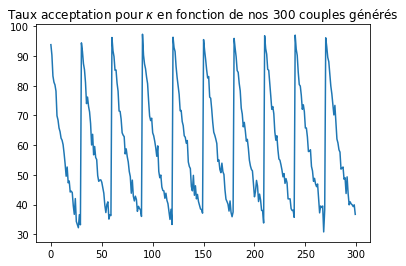

In [370]:
# taux d'acceptation pour kappa selon les 300 couples


plt.title('Taux acceptation pour $\kappa$ en fonction de nos 300 couples générés')
plt.plot(l_kappa)

De cette forme périodique, on déduit que le taux d'acceptation pour $\kappa$ varie peu avec la première variance $\sigma_1$.
Fixons $\sigma_1$(par exemple =0.05 mais cela n'a pas d'importance) : 

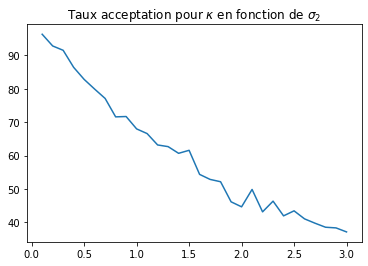

In [371]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.1,3,30),df[df['sigma_1']==0.05]['taux_kappa'])   


Un taux d'acceptation de l'ordre de 40 à 50 \% est bien

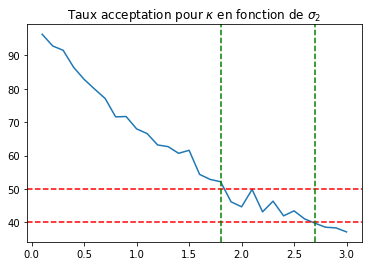

In [373]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.1,3,30),df[df['sigma_1']==0.05]['taux_kappa'])
plt.axhline(40, color='red',linestyle='--')
plt.axhline(50, color='red',linestyle='--')
plt.axvline(1.8, color='green',linestyle='--')
plt.axvline(2.7, color='green',linestyle='--')

On voit que pour $\sigma_2 \in [1,8;2,7]$, on a un bon taux d'acceptation. La valeur de $\sigma_2 = 2$ qu'on a choisi depuis le début est donc adaptée.

Une fois $\sigma_2$ choisie, quelle valeur prendre pour $\sigma_1$ ?
Représentons le taux d'acceptation en fonction de $\sigma_1$ (cette fois on a fixé l'autre variance à 2) :

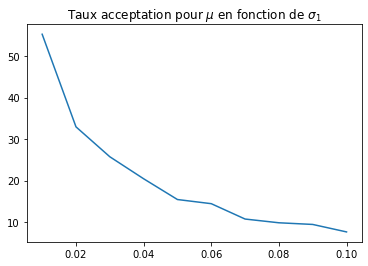

In [374]:
plt.title('Taux acceptation pour $\mu$ en fonction de $\sigma_1$')

plt.plot(np.linspace(0.01,0.1,10),df[df['sigma_2']==2]['taux_mu'])

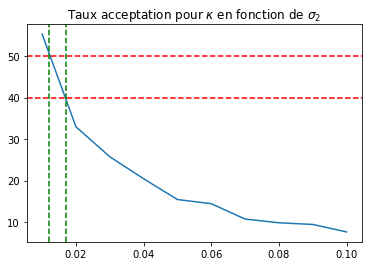

In [380]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.01,0.1,10),df[df['sigma_2']==2]['taux_mu'])
plt.axhline(40, color='red',linestyle='--')
plt.axhline(50, color='red',linestyle='--')
plt.axvline(0.012, color='green',linestyle='--')
plt.axvline(0.017, color='green',linestyle='--')

On voit que pour $\sigma_1 \in [0.012;0.017]$, on a un bon taux d'acceptation.

Bilan : critère 3 ok ! 

$\sigma_2 \in [1,8;2,7]$ et $\sigma_1 \in [0.012;0.017]$ sont de bons paramètres

### critère 4

Tracons les fonction d'autocorrélations pour $\mu$ et $\kappa$ et vérifions qu'elles décroissent rapidement : 

In [382]:
N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5                        
y[0,92]=10                           


for n in tqdm(range(1, 10000)):
    y3[n] = metropolis_within_gibbs_bis(y3[n-1],sigma_1=0.015,sigma_2=2)    # bons paramètres comme vu au-dessus

100%|██████████| 9999/9999 [01:05<00:00, 152.52it/s]


In [78]:
plot_acf(y[:,91])
plt.title("Autocorrélation pour $\mu$")

plot_acf(y[:,92])
plt.title("Autocorrélation pour $\kappa$")

NameError: name 'plot_acf' is not defined

Bilan : critère 4 ok ! Les autocorrélations décroissent très rapidement !

### critère 5

DSCM = $\frac{1}{N}\sum_{j=0}^{N-1}(x_j-x_{j+1})^2$

Il faut maximiser cette quantité ; on va voir pour quel couple de variances cette quantité est la plus élevée

In [393]:
def metropolis_DSCM(x,sigma_1,sigma_2):
    DSCM_mu=0                                     # initialisation des DSCM à 0                                                     
    DSCM_kappa=0                           
    
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93) 
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()      
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:            
        y[91]=z
        DSCM_mu+=(y[91]-mu)**2         # si on a une nouvelle valeur, la DSCM augmente, sinon elle reste à 0
    
    else:
        y[91]=mu                             
    
    
    w = kap + sigma_2 * np.random.randn()         
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
        DSCM_kappa+=(y[92]-kap)**2          # si on a une nouvelle valeur, la DSCM augmente, sinon elle reste à 0 
    
    else:
        y[92]=kap                            

    
    return y,DSCM_mu,DSCM_kappa     # on retourne les DSCM en plus de y

In [395]:
def DSCM(sigma_1,sigma_2):    # fonction qui évalue nos DSCM en fonction des variances
    N = 1000                           
    y = np.zeros((N, 93))

    for i in range (0,91):
        y[0,i]=data['prob'][i]
    y[0,91]=0.5
    y[0,92]=10
    
    DSCM_mu=0
    DSCM_kappa=0

    for n in tqdm(range(1, 1000)):
        r=metropolis_taux(y[n-1],sigma_1,sigma_2)
        y[n]=r[0]
        DSCM_mu+=r[1]
        DSCM_kappa+=r[2]
    
    return DSCM_mu/1000,DSCM_kappa/1000

In [396]:
# faisons maintenant varier sigma_1 et sigma_2 

l_mu, l_kappa = [],[]
for sigma_1 in np.linspace(0.01,0.1,10):                # sigma_1 va de 0,01 ; 0,02 ;... jusqu'à 0.1
    for sigma_2 in np.linspace(0.1,3,30):               # sigma_2 va de 0,1 ; 0,2 ;... jusqu'à 3
        r=DSCM(sigma_1,sigma_2)
        l_mu.append(r[0])
        l_kappa.append(r[1])

100%|██████████| 999/999 [00:07<00:00, 142.19it/s]


In [397]:
# dataframe regroupant les résultats

# liste pour sigma_1

sigma_1=[]
for k in np.linspace(0.01,0.1,10):
    sigma_1+=30*[k]
    

# liste pour sigma_2

sigma_2=[]
for k in range(0,10):
    sigma_2=np.hstack((sigma_2,np.linspace(0.1,3,30)))
    
dg = pd.DataFrame({'sigma_1':sigma_1, 'sigma_2':sigma_2, 'DSCM_mu':l_mu, 'DSCM_kappa':l_kappa})
dg['sigma_1']=dg['sigma_1'].apply(lambda s: np.round(s,2))

In [398]:
dg

,sigma_1,sigma_2,DSCM_mu,DSCM_kappa
0,0.01,0.1,0.587,0.914
1,0.01,0.2,0.529,0.908
2,0.01,0.3,0.539,0.856
3,0.01,0.4,0.565,0.777
4,0.01,0.5,0.561,0.759
...,...,...,...,...
295,0.10,2.6,0.083,0.373
296,0.10,2.7,0.083,0.398
297,0.10,2.8,0.085,0.383
298,0.10,2.9,0.066,0.386


In [399]:
# export au format csv

dg.to_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_DSCM.csv",index=False)
dg=pd.read_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_DSCM.csv")

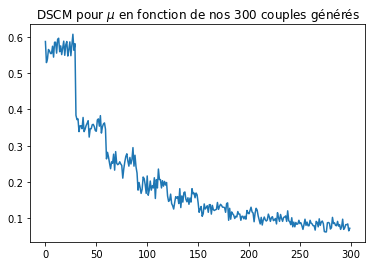

In [400]:
# DSCM pour mu selon les 300 couples


plt.title('DSCM pour $\mu$ en fonction de nos 300 couples générés')
plt.plot(l_mu)

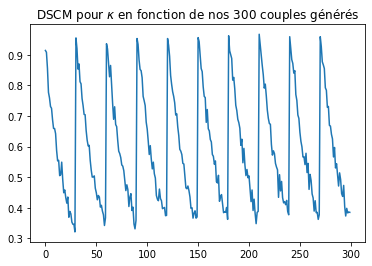

In [401]:
# DSCM pour kappa selon les 300 couples


plt.title('DSCM pour $\kappa$ en fonction de nos 300 couples générés')
plt.plot(l_kappa)

On obtient des graphes assez identiques aux taux d'acceptation.

En pratique, on utilise plutôt le critère DSCM que le taux d'acceptation

Text(0.5, 1.0, "Comparaison sur l'étude 18 de la loi mélange à notre loi a posteriori")

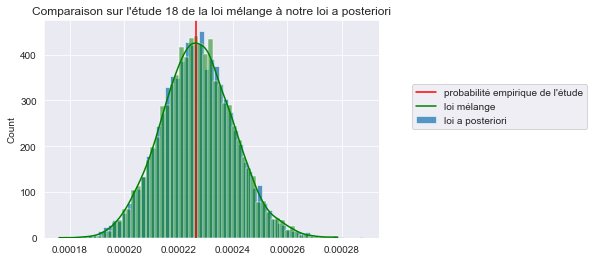

#### Rq générale : on peut utiliser aussi une loi uniforme dans le Metropolis : 

In [176]:
def uniforme(a,b):
    return(a+(b-a)*rd.random())

In [177]:
def metropolis_within_gibbs_ter(x,eps1,eps2):
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93)  
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = uniforme(mu-eps1,mu+eps1)      # proposition pour la prochaine valeur de mu : loi uniforme centrée sur  
                                       # la valeur précédente et de support dépendant de eps1
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             
        y[91]=z
    
    else:
        y[91]=mu                            
    
    
    w = uniforme(kap-eps2,kap+eps2)        # proposition pour la prochaine valeur de kappa : loi unifrome centrée
                                           # sur la valeur précédente et de support dépendant de eps2
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
    
    else:
        y[92]=kap                            

    
    return y      

In [181]:
N = 10000                          # 10 000 itérations 
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10

for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs_ter(y[n-1],eps1=0.3,eps2=1)

100%|██████████| 9999/9999 [01:03<00:00, 157.25it/s]


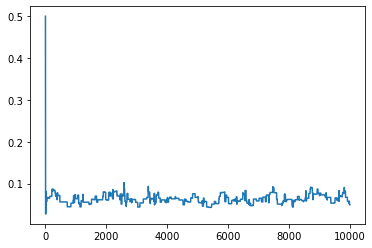

In [182]:
plt.plot(y[:,91])

# MCMC trace pour mu

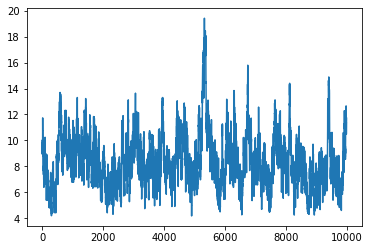

In [183]:
plt.plot(y[:,92])

# MCMC trace pour kappa

On obtient les mêmes résultats

## Question 3 : 

In [75]:
def mwg_beta(x,sigma_1,sigma_2,m):
    # m paramètre de mélange
    u = np.random.binomial(1,m)
    y = metropolis_within_gibbs_bis(x, sigma_1, sigma_2)
    z = metropolis_within_gibbs_bis(x, sigma_1, sigma_2)
        
    return u*y + (1-u)*z

Text(0.5, 1.0, "Comparaison sur l'étude 18 de la loi mélange à notre loi a posteriori")

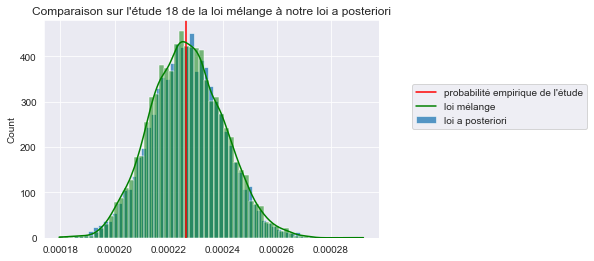

In [76]:
alpha=data['nb_pos'][18]+moy1*moy2
beta=data['nb_test'][18]-data['nb_pos'][18]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,18])
plt.axvline(data['prob'][18], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude",'loi mélange','loi a posteriori'],loc=(1.1,0.5))
plt.title("Comparaison sur l'étude 18 de la loi mélange à notre loi a posteriori")
# MCMC trace pour probabilité de l'étude 18

Text(0.5, 1.0, "['kappa']")

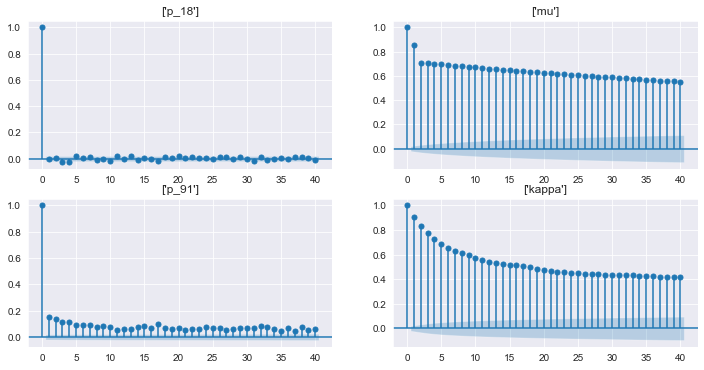

In [81]:

fig, ax = plt.subplots(2,2,figsize=(12,6))
plot_acf(y[:, 18], ax=ax[0,0])
ax[0,0].set_title(['p_18'])
plot_acf(y[:, 89], ax=ax[1,0])
ax[1,0].set_title(['p_91'])
plot_acf(y[:, 91], ax=ax[0,1])
ax[0,1].set_title(['mu'])
plot_acf(y[:, 92], ax=ax[1,1])
ax[1,1].set_title(['kappa'])
#plt.title('Autocorrélogrammes')